In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy 
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.special import erfc

In [24]:
df = pd.read_csv('../Reading/relative_error.csv')
df = df.apply(lambda x: x.sort_values().values)
list_voltage = []
for i in df.columns:
    list_voltage.append(str(i))

df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=list_voltage)
df_melt = df_melt.drop(columns=['index'])
# replace column names
df_melt.columns = ['pH', 'value']
df_melt

,pH,value
0,pH 2.17,-0.737327
1,pH 2.17,-0.737327
2,pH 2.17,-0.691244
3,pH 2.17,-0.552995
4,pH 2.17,-0.506912
...,...,...
4995,pH 13.15,0.320152
4996,pH 13.15,0.329278
4997,pH 13.15,0.333840
4998,pH 13.15,0.362738


In [25]:
def chauvenet(array):
    mean = array.mean()           # Mean of incoming array
    stdv = array.std()            # Standard deviation
    N = len(array)                # Lenght of incoming array
    criterion = 1.0/(2*N)         # Chauvenet's criterion
    d = abs(array-mean)/stdv      # Distance of a value to mean in stdv's
    prob = erfc(d)                # Area normal dist.    
    return prob < criterion 

In [26]:
df = {}
df_remove = df_melt
df_remove = df_remove.reset_index()

In [27]:
count = 1
while(len(df_remove[chauvenet(df_remove['value']) == True]) != 0 ):
    len_0 = len(df_remove)
    print(df_remove['value'].mean())
    df[f'Iteration - {count}'] = [df_remove['value'].mean(), df_remove['value'].std()]
    df_remove = df_remove.drop(df_remove[chauvenet(df_remove['value']) == True].index)
    df[f'Iteration - {count}'].append(len_0 - len(df_remove))
    df_remove = df_remove.reset_index(drop=True)
    count += 1

df = pd.DataFrame(df, index=['Mean', 'Standard Deviation', 'Outlier'])

0.1298104189108058
0.11115914592766599
0.10484643796702615
0.10153473220383337
0.09718936718290477


In [28]:
df.to_excel('../Reading/Chauvenet Table.xlsx')

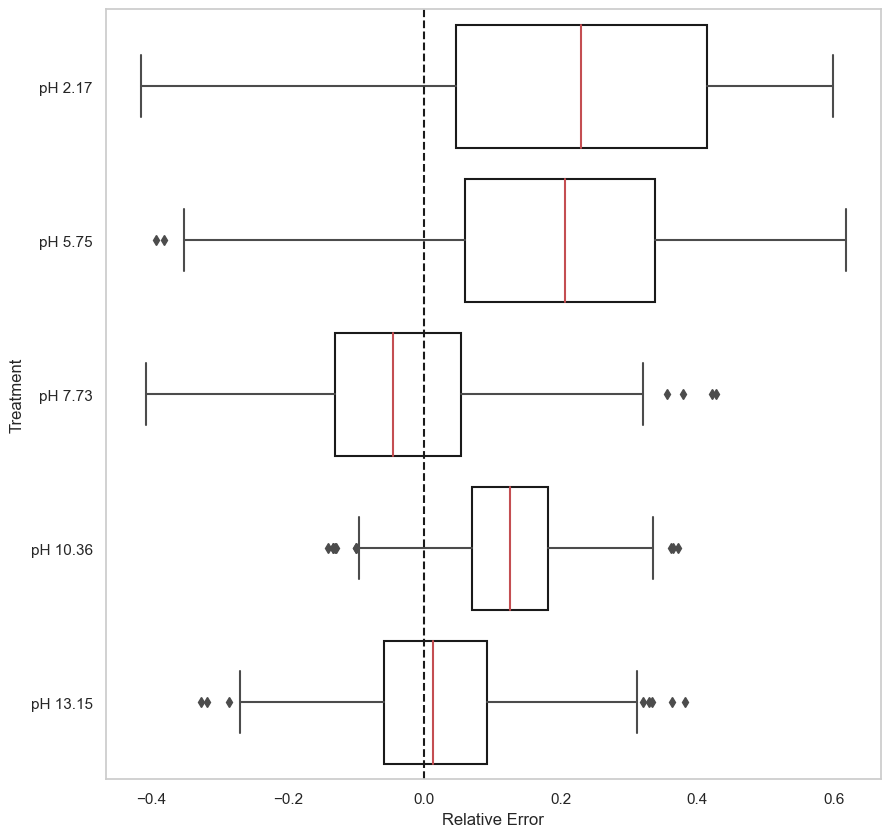

In [11]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style('whitegrid', {'axes.grid' : False})
ax = sns.boxplot(
    x='value', 
    y='pH', 
    data=df_remove, 
    boxprops = {"edgecolor":'k', 'facecolor':'w'},
    medianprops={"color": "r"},)
ax.set(xlabel='Relative Error', ylabel='Treatment')
plt.axvline(0, color = 'k',linestyle= '--')
plt.savefig('../Reading/img/Boxplot pH Chauvenet.png')
plt.show()

In [13]:
df_remove.to_csv('../Reading/Remove Outlier Chauvenet.csv')